In [1]:
import pandas as pd
import numpy as np
import torch
import os
import sys
import matplotlib.pyplot as plt

sys.path.append('..')
from src.models.model import VSpyct
from src.utils import (calculate_bs, fix_predictions, plot_brier)
from src.data.dataset import SurvivalDataset
from src.eval import IPCWBrier

/Users/viktorandonovic/miniconda3/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = SurvivalDataset(fname='pbc.rda', path='../data/raw/')
print(data.dataset.head())
X_train, X_test, y_train, y_test = data.get_tensors()

   id  time  status trt        age sex ascites hepato spiders  edema  bili  \
0   1   400       2   1  58.765229   f       1      1       1    1.0  14.5   
1   2  4500       0   1  56.446270   f       0      1       1    0.0   1.1   
2   3  1012       2   1  70.072553   m       0      0       0    0.5   1.4   
3   4  1925       2   1  54.740589   f       0      1       1    0.5   1.8   
4   5  1504       1   2  38.105407   f       0      1       1    0.0   3.4   

  chol  albumin copper  alk.phos     ast trig platelet  protime stage  
0  261     2.60    156    1718.0  137.95  172      190     12.2     4  
1  302     4.14     54    7394.8  113.52   88      221     10.6     3  
2  176     3.48    210     516.0   96.10   55      151     12.0     4  
3  244     2.54     64    6121.8   60.63   92      183     10.3     4  
4  279     3.53    143     671.0  113.15   72      136     10.9     3  
4795
Succesfully created time tensor of shape: torch.Size([418, 4795])
(334, 769) torch.Size([334, 

In [3]:
model = VSpyct(max_depth=3, bs=64)
model.fit(X_train, y_train)

Total variance: 569.7177124023438
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 3/500 [00:00<00:59,  8.36it/s]

[iteration 0001] loss: 529264018227.2000
[iteration 0002] loss: 492315593932.7999
[iteration 0003] loss: 432291884851.2001


Epochs:   1%|          | 5/500 [00:00<00:48, 10.23it/s]

[iteration 0004] loss: 398116433100.8000
[iteration 0005] loss: 363097953280.0000
[iteration 0006] loss: 330186076569.6000


Epochs:   2%|▏         | 9/500 [00:00<00:41, 11.88it/s]

[iteration 0007] loss: 307797557043.2000
[iteration 0008] loss: 279040575999.9999
[iteration 0009] loss: 255112559616.0000


Epochs:   2%|▏         | 11/500 [00:01<00:39, 12.28it/s]

[iteration 0010] loss: 234849442713.6000
[iteration 0011] loss: 217217415475.2000
[iteration 0012] loss: 201787141683.2000


Epochs:   3%|▎         | 15/500 [00:01<00:37, 12.78it/s]

[iteration 0013] loss: 182553481676.8000
[iteration 0014] loss: 167422486937.6000
[iteration 0015] loss: 149609508172.8000


Epochs:   3%|▎         | 17/500 [00:01<00:37, 12.98it/s]

[iteration 0016] loss: 139361891545.6000
[iteration 0017] loss: 130474565209.6000
[iteration 0018] loss: 123349116859.2000


Epochs:   4%|▍         | 21/500 [00:01<00:35, 13.36it/s]

[iteration 0019] loss: 112532950202.4000
[iteration 0020] loss: 108635394892.8000
[iteration 0021] loss: 100723232977.8500


Epochs:   5%|▍         | 23/500 [00:01<00:36, 12.99it/s]

[iteration 0022] loss: 96951396858.5000
[iteration 0023] loss: 92616347184.6000
[iteration 0024] loss: 84802498159.7812


Epochs:   5%|▌         | 27/500 [00:02<00:36, 12.87it/s]

[iteration 0025] loss: 77932184852.8430
[iteration 0026] loss: 75012519126.8562
[iteration 0027] loss: 72522419169.4000


Epochs:   6%|▌         | 29/500 [00:02<00:36, 12.79it/s]

[iteration 0028] loss: 69983737115.7594
[iteration 0029] loss: 68870824837.2000
[iteration 0030] loss: 64023521288.8000


Epochs:   7%|▋         | 33/500 [00:02<00:39, 11.88it/s]

[iteration 0031] loss: 63102015990.8297
[iteration 0032] loss: 62771584006.4000
[iteration 0033] loss: 59381392029.0500


Epochs:   7%|▋         | 35/500 [00:02<00:37, 12.29it/s]

[iteration 0034] loss: 57955732274.8969
[iteration 0035] loss: 56484004895.7250
[iteration 0036] loss: 55220642680.3750


Epochs:   8%|▊         | 39/500 [00:03<00:36, 12.56it/s]

[iteration 0037] loss: 52867512418.0500
[iteration 0038] loss: 53652989270.1000
[iteration 0039] loss: 52043552993.0750


Epochs:   8%|▊         | 41/500 [00:03<00:35, 12.78it/s]

[iteration 0040] loss: 51404762364.5812
[iteration 0041] loss: 49357986463.7828
[iteration 0042] loss: 48700468801.1750


Epochs:   9%|▉         | 45/500 [00:03<00:34, 13.15it/s]

[iteration 0043] loss: 49481364372.1625
[iteration 0044] loss: 49840914228.3000
[iteration 0045] loss: 47909019540.7361


Epochs:   9%|▉         | 47/500 [00:03<00:34, 13.28it/s]

[iteration 0046] loss: 47732917539.9000
[iteration 0047] loss: 47120975158.1438
[iteration 0048] loss: 48293473958.8713


Epochs:  10%|▉         | 49/500 [00:04<00:37, 12.01it/s]


[iteration 0049] loss: 47440832619.8750
Early stopping at epoch 49.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(560.7651)
Var right tensor(588.1228)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 160918923264.0000
[iteration 0002] loss: 155415608524.8000
[iteration 0003] loss: 147852948684.8000


Epochs:   2%|▏         | 9/500 [00:00<00:12, 39.98it/s]

[iteration 0004] loss: 143964217958.4000
[iteration 0005] loss: 140393317376.0000
[iteration 0006] loss: 138493502873.6000
[iteration 0007] loss: 131236791500.8000
[iteration 0008] loss: 131339807129.6000
[iteration 0009] loss: 128335890022.4000
[iteration 0010] loss: 122253464678.4000
[iteration 0011] loss: 120974089932.8000
[iteration 0012] loss: 115398874214.4000


Epochs:   3%|▎         | 17/500 [00:00<00:12, 39.31it/s]

[iteration 0013] loss: 112368436582.4000
[iteration 0014] loss: 109391499776.0000
[iteration 0015] loss: 108255783526.4000
[iteration 0016] loss: 102403822284.8000
[iteration 0017] loss: 97602957004.8000
[iteration 0018] loss: 99037323673.6000
[iteration 0019] loss: 99419362048.0000
[iteration 0020] loss: 96102709964.8000


Epochs:   5%|▌         | 25/500 [00:00<00:12, 38.54it/s]

[iteration 0021] loss: 93169266176.0000
[iteration 0022] loss: 90495520665.6000
[iteration 0023] loss: 86380214988.8000
[iteration 0024] loss: 83802750310.4000
[iteration 0025] loss: 83208633881.6000
[iteration 0026] loss: 81493302016.0000
[iteration 0027] loss: 78078092441.6000
[iteration 0028] loss: 73954948480.0000


Epochs:   7%|▋         | 34/500 [00:00<00:11, 39.39it/s]

[iteration 0029] loss: 73253967104.0000
[iteration 0030] loss: 72134568243.2000
[iteration 0031] loss: 72108588851.2000
[iteration 0032] loss: 70354969318.4000
[iteration 0033] loss: 67532668403.2000
[iteration 0034] loss: 66697920576.0000
[iteration 0035] loss: 65369279200.0000
[iteration 0036] loss: 64391035296.0000
[iteration 0037] loss: 63301654245.6000


Epochs:   8%|▊         | 42/500 [00:01<00:11, 39.37it/s]

[iteration 0038] loss: 59222646993.6000
[iteration 0039] loss: 60129938809.6000
[iteration 0040] loss: 58998619049.6000
[iteration 0041] loss: 56638601872.8000
[iteration 0042] loss: 55615303223.3000
[iteration 0043] loss: 55674766672.0000
[iteration 0044] loss: 57221069047.3000
[iteration 0045] loss: 52977614117.7500


Epochs:  10%|█         | 50/500 [00:01<00:11, 39.46it/s]

[iteration 0046] loss: 51800936346.6875
[iteration 0047] loss: 51880216595.0000
[iteration 0048] loss: 51673149416.6750
[iteration 0049] loss: 53963853668.9125
[iteration 0050] loss: 50936198777.8313
[iteration 0051] loss: 46755980308.6000
[iteration 0052] loss: 49742076544.6000
[iteration 0053] loss: 46491599524.6623


Epochs:  12%|█▏        | 58/500 [00:01<00:11, 39.49it/s]

[iteration 0054] loss: 46971765478.7562
[iteration 0055] loss: 47809915841.8576
[iteration 0056] loss: 43839718254.5500
[iteration 0057] loss: 46274925956.3938
[iteration 0058] loss: 45249600744.4000


Epochs:  12%|█▏        | 58/500 [00:01<00:11, 38.65it/s]


Early stopping at epoch 58.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(571.1442)
Var right tensor(601.0695)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 67803546419.2000
[iteration 0002] loss: 71640366694.4000
[iteration 0003] loss: 70508497715.2000
[iteration 0004] loss: 67532443238.4000


Epochs:   2%|▏         | 8/500 [00:00<00:06, 76.78it/s]

[iteration 0005] loss: 66985320448.0000
[iteration 0006] loss: 66754639872.0000
[iteration 0007] loss: 67824039936.0000
[iteration 0008] loss: 62452457881.6000
[iteration 0009] loss: 66316519833.6000
[iteration 0010] loss: 61627620147.2000
[iteration 0011] loss: 60820653670.4000
[iteration 0012] loss: 62048251494.4000
[iteration 0013] loss: 59977555968.0000
[iteration 0014] loss: 58833825792.0000
[iteration 0015] loss: 58298624409.6000
[iteration 0016] loss: 58355308134.4000
[iteration 0017] loss: 54696961638.4000


Epochs:   3%|▎         | 17/500 [00:00<00:06, 79.30it/s]

[iteration 0018] loss: 55126333849.6000
[iteration 0019] loss: 52244525056.0000
[iteration 0020] loss: 51794642124.8000


Epochs:   5%|▌         | 25/500 [00:00<00:06, 77.93it/s]

[iteration 0021] loss: 52504838553.6000
[iteration 0022] loss: 51046031769.6000
[iteration 0023] loss: 49885704601.6000
[iteration 0024] loss: 50325488025.6000
[iteration 0025] loss: 48656779264.0000
[iteration 0026] loss: 48832102809.6000
[iteration 0027] loss: 48562021580.8000
[iteration 0028] loss: 47949298483.2000
[iteration 0029] loss: 45659425587.2000
[iteration 0030] loss: 42754809036.8000


Epochs:   6%|▋         | 32/500 [00:00<00:06, 76.26it/s]

[iteration 0031] loss: 43847294566.4000
[iteration 0032] loss: 44268801228.8000
Early stopping at epoch 32.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Var left tensor(nan)
Var right tensor(601.0695)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 68780654182.4000
[iteration 0002] loss: 66884318412.8000


Epochs:   2%|▏         | 9/500 [00:00<00:07, 65.54it/s]


[iteration 0003] loss: 68488611020.8000
[iteration 0004] loss: 67198729420.8000
[iteration 0005] loss: 62104521932.8000
[iteration 0006] loss: 62833481728.0000
[iteration 0007] loss: 58554823884.8000
[iteration 0008] loss: 59018403020.8000
[iteration 0009] loss: 61712746086.4000
Early stopping at epoch 9.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(586.5095)
Var right tensor(568.1898)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   0%|          | 0/500 [00:00<?, ?it/s]

[iteration 0001] loss: 464261324800.0000


Epochs:   1%|          | 4/500 [00:00<00:26, 18.92it/s]

[iteration 0002] loss: 445131129241.6000
[iteration 0003] loss: 416070483148.8000
[iteration 0004] loss: 389870787788.8000
[iteration 0005] loss: 370236131328.0000


Epochs:   2%|▏         | 8/500 [00:00<00:25, 19.34it/s]

[iteration 0006] loss: 351702023782.4000
[iteration 0007] loss: 334444781158.4000
[iteration 0008] loss: 309622035660.8000
[iteration 0009] loss: 300176861388.7999


Epochs:   2%|▏         | 12/500 [00:00<00:25, 19.45it/s]

[iteration 0010] loss: 288457607372.8000
[iteration 0011] loss: 263592375296.0000
[iteration 0012] loss: 251949671423.9999
[iteration 0013] loss: 233700883865.6000


Epochs:   3%|▎         | 16/500 [00:00<00:24, 19.48it/s]

[iteration 0014] loss: 222833254604.8000
[iteration 0015] loss: 211653465497.6000
[iteration 0016] loss: 202684032000.0000
[iteration 0017] loss: 192010375577.6000


Epochs:   4%|▍         | 20/500 [00:01<00:24, 19.48it/s]

[iteration 0018] loss: 185033732812.8000
[iteration 0019] loss: 167658268774.4000
[iteration 0020] loss: 162063753011.2000
[iteration 0021] loss: 154004377907.2000


Epochs:   5%|▍         | 24/500 [00:01<00:24, 19.50it/s]

[iteration 0022] loss: 144249857638.4000
[iteration 0023] loss: 136896785715.2000
[iteration 0024] loss: 133039857152.0000
[iteration 0025] loss: 124097325568.0000


Epochs:   6%|▌         | 28/500 [00:01<00:24, 19.41it/s]

[iteration 0026] loss: 121405439129.6000
[iteration 0027] loss: 116801184870.4000
[iteration 0028] loss: 109814638592.0000
[iteration 0029] loss: 102428751513.6000


Epochs:   6%|▋         | 32/500 [00:01<00:24, 19.44it/s]

[iteration 0030] loss: 95243121612.8000
[iteration 0031] loss: 91101822848.0000
[iteration 0032] loss: 86701248691.2000
[iteration 0033] loss: 81978325939.2000


Epochs:   7%|▋         | 36/500 [00:01<00:23, 19.46it/s]

[iteration 0034] loss: 78407734016.0000
[iteration 0035] loss: 77723571712.0000
[iteration 0036] loss: 70596007244.8000
[iteration 0037] loss: 68159159590.4000


Epochs:   8%|▊         | 40/500 [00:02<00:23, 19.41it/s]

[iteration 0038] loss: 66849870822.4000
[iteration 0039] loss: 61794594585.6000
[iteration 0040] loss: 61787214080.0000
[iteration 0041] loss: 54932056665.6000


Epochs:   9%|▉         | 44/500 [00:02<00:23, 19.42it/s]

[iteration 0042] loss: 55392618176.0000
[iteration 0043] loss: 53296119238.4000
[iteration 0044] loss: 50500254808.0000
[iteration 0045] loss: 50396619580.8000


Epochs:  10%|▉         | 48/500 [00:02<00:23, 19.39it/s]

[iteration 0046] loss: 46921833724.8000
[iteration 0047] loss: 44235081482.4000
[iteration 0048] loss: 43953279813.4000
[iteration 0049] loss: 42637362212.8000


Epochs:  10%|█         | 52/500 [00:02<00:23, 19.43it/s]

[iteration 0050] loss: 40773228243.5547
[iteration 0051] loss: 38551818192.0500
[iteration 0052] loss: 39692727209.0500
[iteration 0053] loss: 36263970178.7875


Epochs:  11%|█         | 56/500 [00:02<00:22, 19.54it/s]

[iteration 0054] loss: 37450315526.7969
[iteration 0055] loss: 35749211814.6000
[iteration 0056] loss: 34477268920.5875
[iteration 0057] loss: 32007570403.2875


Epochs:  12%|█▏        | 60/500 [00:03<00:22, 19.43it/s]

[iteration 0058] loss: 32650323478.3812
[iteration 0059] loss: 30765928201.3893
[iteration 0060] loss: 29418925123.2609
[iteration 0061] loss: 29116232350.4125


Epochs:  13%|█▎        | 64/500 [00:03<00:22, 19.45it/s]

[iteration 0062] loss: 26766740003.0000
[iteration 0063] loss: 26374424611.8125
[iteration 0064] loss: 27474250147.8688
[iteration 0065] loss: 26700260084.3563


Epochs:  14%|█▎        | 68/500 [00:03<00:22, 19.42it/s]

[iteration 0066] loss: 25123190131.8500
[iteration 0067] loss: 26832053967.5687
[iteration 0068] loss: 25413798581.4000


Epochs:  14%|█▎        | 68/500 [00:03<00:22, 19.12it/s]


Early stopping at epoch 68.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(465.9413)
Var right tensor(585.0678)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 4/500 [00:00<00:12, 38.82it/s]

[iteration 0001] loss: 150160879616.0000
[iteration 0002] loss: 147009312768.0000
[iteration 0003] loss: 139766872473.6000
[iteration 0004] loss: 135033656115.2000
[iteration 0005] loss: 135124067123.2000
[iteration 0006] loss: 133434665369.6000
[iteration 0007] loss: 121426906316.8000


Epochs:   2%|▏         | 9/500 [00:00<00:12, 39.46it/s]

[iteration 0008] loss: 121616746905.6000
[iteration 0009] loss: 119519825510.4000


Epochs:   3%|▎         | 13/500 [00:00<00:12, 39.35it/s]

[iteration 0010] loss: 111094927360.0000
[iteration 0011] loss: 108774458163.2000
[iteration 0012] loss: 107034707968.0000
[iteration 0013] loss: 102509647052.8000
[iteration 0014] loss: 99606865510.4000
[iteration 0015] loss: 95035206860.8000


Epochs:   3%|▎         | 17/500 [00:00<00:12, 39.15it/s]

[iteration 0016] loss: 93734912409.6000
[iteration 0017] loss: 87625211494.4000


Epochs:   4%|▍         | 21/500 [00:00<00:12, 38.79it/s]

[iteration 0018] loss: 85698991718.4000
[iteration 0019] loss: 84717807616.0000
[iteration 0020] loss: 79329422745.6000
[iteration 0021] loss: 76977840128.0000
[iteration 0022] loss: 76709345484.8000
[iteration 0023] loss: 73149063168.0000


Epochs:   5%|▌         | 25/500 [00:00<00:12, 39.06it/s]

[iteration 0024] loss: 68020316364.8000
[iteration 0025] loss: 70365431603.2000


Epochs:   6%|▌         | 29/500 [00:00<00:12, 38.58it/s]

[iteration 0026] loss: 69155911680.0000
[iteration 0027] loss: 64445386342.4000
[iteration 0028] loss: 59907431833.6000
[iteration 0029] loss: 57939978035.2000
[iteration 0030] loss: 58361401753.6000
[iteration 0031] loss: 57431573708.8000


Epochs:   7%|▋         | 33/500 [00:00<00:12, 38.74it/s]

[iteration 0032] loss: 54356584448.0000
[iteration 0033] loss: 51848232140.8000


Epochs:   7%|▋         | 37/500 [00:00<00:11, 38.60it/s]

[iteration 0034] loss: 50397246976.0000
[iteration 0035] loss: 47173664665.6000
[iteration 0036] loss: 45682007552.0000
[iteration 0037] loss: 44193867776.0000
[iteration 0038] loss: 43980448051.2000
[iteration 0039] loss: 39766800793.6000


Epochs:   8%|▊         | 41/500 [00:01<00:11, 38.70it/s]

[iteration 0040] loss: 39249366732.8000
[iteration 0041] loss: 38426430566.4000


Epochs:   9%|▉         | 45/500 [00:01<00:11, 38.49it/s]

[iteration 0042] loss: 36765949235.2000
[iteration 0043] loss: 38027908812.8000
[iteration 0044] loss: 35163090944.0000
[iteration 0045] loss: 33226488422.4000
[iteration 0046] loss: 33092254310.4000
[iteration 0047] loss: 31452605184.0000


Epochs:  10%|▉         | 49/500 [00:01<00:11, 38.65it/s]

[iteration 0048] loss: 30699568179.2000
[iteration 0049] loss: 30695643238.4000


Epochs:  11%|█         | 53/500 [00:01<00:11, 38.51it/s]

[iteration 0050] loss: 29098719795.2000
[iteration 0051] loss: 27875376844.8000
[iteration 0052] loss: 25807210752.0000
[iteration 0053] loss: 26829588480.0000
[iteration 0054] loss: 24733434265.6000
[iteration 0055] loss: 25407320320.0000


Epochs:  11%|█▏        | 57/500 [00:01<00:11, 38.79it/s]

[iteration 0056] loss: 23342966323.2000
[iteration 0057] loss: 22793549209.6000


Epochs:  12%|█▏        | 61/500 [00:01<00:11, 38.61it/s]

[iteration 0058] loss: 23955172761.6000
[iteration 0059] loss: 22233895833.6000
[iteration 0060] loss: 20632659507.2000
[iteration 0061] loss: 20096582297.6000
[iteration 0062] loss: 18660546406.4000
[iteration 0063] loss: 19495882393.6000


Epochs:  13%|█▎        | 65/500 [00:01<00:11, 38.80it/s]

[iteration 0064] loss: 17779381478.4000
[iteration 0065] loss: 17332601420.8000


Epochs:  14%|█▍        | 69/500 [00:01<00:11, 38.51it/s]

[iteration 0066] loss: 16682546124.8000
[iteration 0067] loss: 14419919500.8000
[iteration 0068] loss: 15558514688.0000
[iteration 0069] loss: 14956106572.8000
[iteration 0070] loss: 14374689100.8000
[iteration 0071] loss: 13030762163.2000


Epochs:  15%|█▍        | 73/500 [00:01<00:11, 38.52it/s]

[iteration 0072] loss: 13002383321.6000
[iteration 0073] loss: 14848523776.0000


Epochs:  15%|█▌        | 77/500 [00:01<00:10, 38.49it/s]

[iteration 0074] loss: 12342087104.0000
[iteration 0075] loss: 12076283046.4000
[iteration 0076] loss: 11047184089.6000
[iteration 0077] loss: 10897479680.0000
[iteration 0078] loss: 11989705779.2000
[iteration 0079] loss: 10316631334.4000


Epochs:  16%|█▌        | 81/500 [00:02<00:10, 38.66it/s]

[iteration 0080] loss: 9635399846.4000
[iteration 0081] loss: 9669953177.6000


Epochs:  17%|█▋        | 85/500 [00:02<00:10, 38.41it/s]

[iteration 0082] loss: 9666494992.0000
[iteration 0083] loss: 9514443116.8000
[iteration 0084] loss: 9401764505.6000
[iteration 0085] loss: 9946405574.4000
[iteration 0086] loss: 7967962304.0000
[iteration 0087] loss: 8081094707.2000


Epochs:  18%|█▊        | 89/500 [00:02<00:10, 38.44it/s]

[iteration 0088] loss: 8867153696.0000
[iteration 0089] loss: 7439754004.8000


Epochs:  19%|█▊        | 93/500 [00:02<00:10, 38.36it/s]

[iteration 0090] loss: 7465905644.8000
[iteration 0091] loss: 7956315072.0000
[iteration 0092] loss: 7208859667.2000
[iteration 0093] loss: 7017059956.0000
[iteration 0094] loss: 5919354635.2000
[iteration 0095] loss: 6876500770.4266


Epochs:  19%|█▉        | 96/500 [00:02<00:10, 38.28it/s]


[iteration 0096] loss: 7398299363.2000
Early stopping at epoch 96.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(517.6898)
Var right tensor(573.9558)
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)


Epochs:   1%|          | 3/500 [00:00<00:18, 26.96it/s]

[iteration 0001] loss: 343730954649.6000
[iteration 0002] loss: 337994847027.2001
[iteration 0003] loss: 324775529676.8000
[iteration 0004] loss: 318346135552.0001


Epochs:   1%|          | 6/500 [00:00<00:17, 27.62it/s]

[iteration 0005] loss: 302520433049.6000
[iteration 0006] loss: 293479385907.2000


Epochs:   2%|▏         | 9/500 [00:00<00:17, 27.69it/s]

[iteration 0007] loss: 281918132224.0000
[iteration 0008] loss: 274845559193.6000
[iteration 0009] loss: 270737870438.4000
[iteration 0010] loss: 262421152972.8000


Epochs:   2%|▏         | 12/500 [00:00<00:18, 26.91it/s]

[iteration 0011] loss: 252495537356.8000
[iteration 0012] loss: 240641386086.4000


Epochs:   3%|▎         | 15/500 [00:00<00:17, 27.12it/s]

[iteration 0013] loss: 240515211468.8000
[iteration 0014] loss: 225127973888.0000
[iteration 0015] loss: 223911398604.8000
[iteration 0016] loss: 219384261836.8000


Epochs:   4%|▎         | 18/500 [00:00<00:17, 27.26it/s]

[iteration 0017] loss: 208334965555.2000
[iteration 0018] loss: 196693921587.2000


Epochs:   4%|▍         | 21/500 [00:00<00:17, 27.35it/s]

[iteration 0019] loss: 191372403712.0000
[iteration 0020] loss: 181754638131.2000
[iteration 0021] loss: 182781824614.4000
[iteration 0022] loss: 177933788364.8000


Epochs:   5%|▍         | 24/500 [00:00<00:17, 27.47it/s]

[iteration 0023] loss: 177240000512.0000
[iteration 0024] loss: 165142152806.4000


Epochs:   5%|▌         | 27/500 [00:00<00:17, 27.25it/s]

[iteration 0025] loss: 157861399756.8000
[iteration 0026] loss: 153589326438.4000
[iteration 0027] loss: 153976127692.8000
[iteration 0028] loss: 149025813913.6000


Epochs:   6%|▌         | 30/500 [00:01<00:17, 27.34it/s]

[iteration 0029] loss: 144735936512.0000
[iteration 0030] loss: 136418796953.6000


Epochs:   7%|▋         | 33/500 [00:01<00:17, 27.33it/s]

[iteration 0031] loss: 134931262464.0000
[iteration 0032] loss: 127784943001.6000
[iteration 0033] loss: 127596577177.6000
[iteration 0034] loss: 121894068428.8000


Epochs:   7%|▋         | 36/500 [00:01<00:16, 27.38it/s]

[iteration 0035] loss: 117973059788.8000
[iteration 0036] loss: 111670973440.0000


Epochs:   8%|▊         | 39/500 [00:01<00:16, 27.49it/s]

[iteration 0037] loss: 110775379148.8000
[iteration 0038] loss: 106654082457.6000
[iteration 0039] loss: 106903920435.2000
[iteration 0040] loss: 98455233536.0000


Epochs:   8%|▊         | 42/500 [00:01<00:16, 27.58it/s]

[iteration 0041] loss: 97815353344.0000
[iteration 0042] loss: 96771212902.4000


Epochs:   9%|▉         | 45/500 [00:01<00:16, 27.68it/s]

[iteration 0043] loss: 90559327641.6000
[iteration 0044] loss: 88889858662.4000
[iteration 0045] loss: 85605022105.6000
[iteration 0046] loss: 82503280230.4000


Epochs:  10%|▉         | 48/500 [00:01<00:16, 27.62it/s]

[iteration 0047] loss: 78786596659.2000
[iteration 0048] loss: 78770870067.2000


Epochs:  10%|█         | 51/500 [00:01<00:16, 27.65it/s]

[iteration 0049] loss: 77165468262.4000
[iteration 0050] loss: 77120113356.8000
[iteration 0051] loss: 74470871040.0000
[iteration 0052] loss: 70175576985.6000


Epochs:  11%|█         | 54/500 [00:01<00:16, 27.63it/s]

[iteration 0053] loss: 70506095923.2000
[iteration 0054] loss: 67702494617.6000


Epochs:  11%|█▏        | 57/500 [00:02<00:15, 27.72it/s]

[iteration 0055] loss: 64338925363.2000
[iteration 0056] loss: 61505166233.6000
[iteration 0057] loss: 60815888179.2000
[iteration 0058] loss: 61373068390.4000


Epochs:  12%|█▏        | 60/500 [00:02<00:15, 27.63it/s]

[iteration 0059] loss: 55769589248.0000
[iteration 0060] loss: 54169763532.8000


Epochs:  13%|█▎        | 63/500 [00:02<00:15, 27.65it/s]

[iteration 0061] loss: 55171712614.4000
[iteration 0062] loss: 54013589196.8000
[iteration 0063] loss: 51790628352.0000
[iteration 0064] loss: 53330587955.2000


Epochs:  13%|█▎        | 66/500 [00:02<00:15, 27.58it/s]

[iteration 0065] loss: 47581041766.4000
[iteration 0066] loss: 46066761676.8000


Epochs:  14%|█▍        | 69/500 [00:02<00:15, 27.56it/s]

[iteration 0067] loss: 45943512217.6000
[iteration 0068] loss: 44310073139.2000
[iteration 0069] loss: 45025932390.4000
[iteration 0070] loss: 42261793689.6000


Epochs:  14%|█▍        | 72/500 [00:02<00:15, 27.53it/s]

[iteration 0071] loss: 42106058035.2000
[iteration 0072] loss: 41426115379.2000


Epochs:  15%|█▌        | 75/500 [00:02<00:15, 27.55it/s]

[iteration 0073] loss: 40374949171.2000
[iteration 0074] loss: 38680815513.6000
[iteration 0075] loss: 38712370329.6000
[iteration 0076] loss: 37050897766.4000


Epochs:  16%|█▌        | 78/500 [00:02<00:15, 27.58it/s]

[iteration 0077] loss: 35803237785.6000
[iteration 0078] loss: 35699867238.4000


Epochs:  16%|█▌        | 81/500 [00:02<00:15, 27.64it/s]

[iteration 0079] loss: 34372468275.2000
[iteration 0080] loss: 33565419264.0000
[iteration 0081] loss: 33643011302.4000
[iteration 0082] loss: 32391594905.6000


Epochs:  17%|█▋        | 84/500 [00:03<00:15, 27.61it/s]

[iteration 0083] loss: 30491461708.8000
[iteration 0084] loss: 30357008281.6000


Epochs:  17%|█▋        | 87/500 [00:03<00:14, 27.65it/s]

[iteration 0085] loss: 29563798502.4000
[iteration 0086] loss: 28330616857.6000
[iteration 0087] loss: 29532707635.2000
[iteration 0088] loss: 27092336358.4000


Epochs:  18%|█▊        | 90/500 [00:03<00:14, 27.63it/s]

[iteration 0089] loss: 27623802547.2000
[iteration 0090] loss: 26616100403.2000


Epochs:  19%|█▊        | 93/500 [00:03<00:14, 27.71it/s]

[iteration 0091] loss: 25129821542.4000
[iteration 0092] loss: 25447375513.6000
[iteration 0093] loss: 25509632281.6000
[iteration 0094] loss: 22780595315.2000


Epochs:  19%|█▉        | 96/500 [00:03<00:14, 27.78it/s]

[iteration 0095] loss: 23100402086.4000
[iteration 0096] loss: 23918747667.2000


Epochs:  19%|█▉        | 96/500 [00:03<00:14, 27.25it/s]

Early stopping at epoch 96.
Impurity(
  (linear): PyroLinear(in_features=769, out_features=1, bias=True)
)
Var left tensor(415.7966)
Var right tensor(503.1140)


In [4]:
preds = model.predict(X_test)
avg_preds = preds.mean(axis=1)

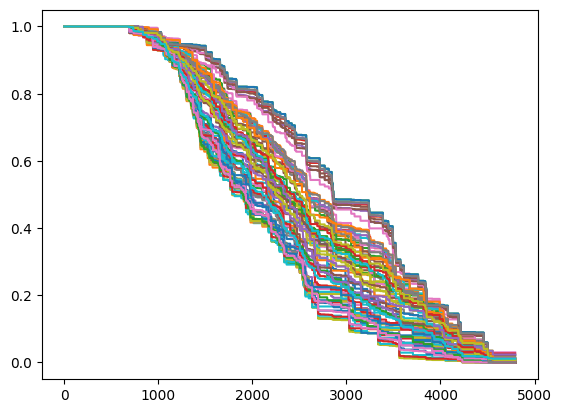

In [5]:
for i in range(80):
  plt.plot(avg_preds[i])

In [6]:
pstore = model.root_node.param_store.detach()

In [7]:
X_train, T_train, E_train, X_test, T_test, E_test = data.pysurvival_split()

In [8]:
import spyct

model = spyct.Model()
model.fit(X_train.values, y_train.numpy())

In [9]:
preds_spyct = model.predict(y_test.numpy())

In [10]:
roots_list = [tree[0].split_weights.to_ndarray()[0] for tree in model.trees]
roots_list = np.array(roots_list)
# [node.split_weights.to_ndarray() for node in nodes_list]

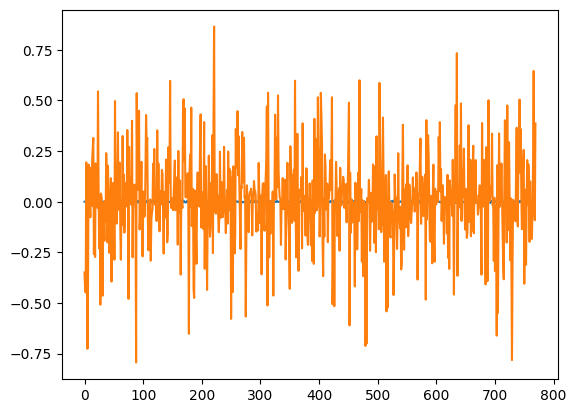

In [11]:
plt.plot(roots_list.mean(axis=0))
plt.plot(pstore)

In [12]:
model.trees[0]

array([<spyct.node.Node object at 0x17b7d2230>,
       <spyct.node.Node object at 0x17f9b0be0>], dtype=object)

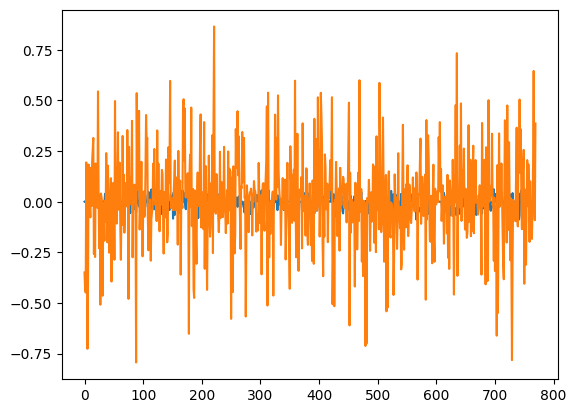

In [13]:
plt.plot(model.trees[0][0].split_weights.to_ndarray()[0])
plt.plot(pstore)

In [14]:
pstore.shape, model.trees[0][0].split_weights.to_ndarray().shape

(torch.Size([770]), (1, 769))

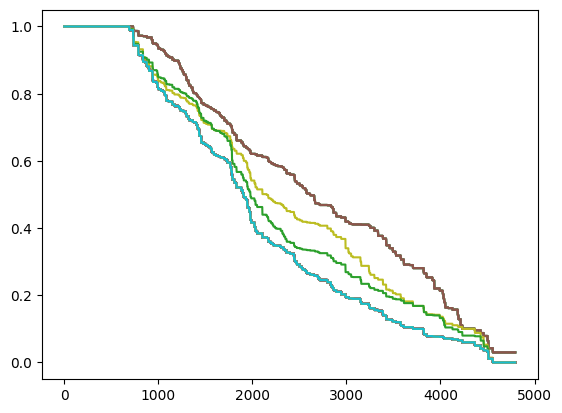

In [15]:
for i in range(80):
  plt.plot(preds_spyct[i])

In [16]:
bs = IPCWBrier(T_test, E_test)

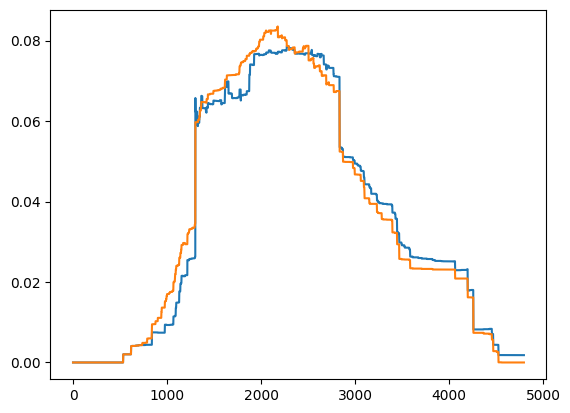

In [17]:
plt.plot(bs.evaluate(y_test, avg_preds))
plt.plot(bs.evaluate(y_test, preds_spyct))

### Interpretability

- Interpret each prediction independently
- Take the path of each sample and calculate distribution of the taken paths
- 

In [15]:
non_leaves = []

def traverse(node):
  if node is not None:
    if node.left is not None or node.right is not None: non_leaves.append(node)
    traverse(node.left)
    traverse(node.right)

traverse(model.root_node)

In [16]:
weights = [node.split_model.weight.numpy() for node in non_leaves]
weights

[array([[-7.68373072e-01, -9.31114554e-01,  7.63386369e-01,
          1.06100392e+00, -4.17283833e-01, -8.99758101e-01,
         -5.48363864e-01, -6.02521420e-01,  2.77935147e-01,
         -6.44819438e-01, -1.17926288e+00, -7.57653773e-01,
         -1.31712711e+00, -9.88086402e-01,  1.20913160e+00,
          1.05346002e-01, -1.01527169e-01,  7.23659754e-01,
          1.28156900e+00, -2.25495175e-01,  4.28838953e-02,
         -1.28054905e+00,  8.46570671e-01,  3.71858031e-01,
          3.99812013e-01,  4.87635016e-01, -1.97532803e-01,
          7.41825402e-01, -7.44453907e-01, -2.03669354e-01,
         -1.78794944e+00,  9.67317402e-01, -5.16612947e-01,
         -9.83200073e-01, -8.44015062e-01, -4.80330765e-01,
          3.45482439e-01,  3.11550140e-01, -2.44919345e-01,
          9.46991622e-01, -4.51710104e-04, -1.77980161e+00,
         -5.42652011e-01, -5.93819499e-01,  5.74084222e-01,
         -7.50122070e-01, -3.60674322e-01,  2.78339684e-01,
          1.82772219e+00,  3.71657498e-0

In [17]:
weights = np.array(weights)

In [18]:
weights = weights.reshape(weights.shape[0], -1)

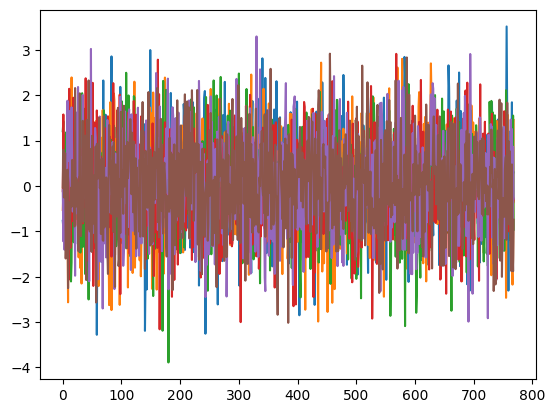

In [19]:
for i in range(weights.shape[0]):
  plt.plot(weights[i])

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

data_normalized = scaler.fit_transform(weights.T).T

In [21]:
filtered_values_per_column = [data_normalized[i, :][data_normalized[i, :] > 0.9] for i in range(data_normalized.shape[0])]

In [22]:
data_normalized.shape

(6, 769)

In [23]:
for node in non_leaves:
  print(node.num_instances)

334
245
155
90
89
59


In [24]:
non_leaves[0].num_instances/model.num_training_instances*(data_normalized[0, :]/np.linalg.norm(data_normalized[0, :]))

array([0.02643487, 0.02472167, 0.04255979, 0.04569283, 0.0301308 ,
       0.02505177, 0.02875092, 0.02818079, 0.03744941, 0.02773552,
       0.02210941, 0.02654771, 0.0206581 , 0.02412193, 0.04725217,
       0.03563256, 0.03345479, 0.04214158, 0.04801473, 0.03214977,
       0.03497501, 0.02104316, 0.04343548, 0.03843815, 0.03873242,
       0.03965694, 0.03244413, 0.04233281, 0.02668666, 0.03237953,
       0.01570172, 0.04470658, 0.02908516, 0.02417337, 0.02563858,
       0.0294671 , 0.03816049, 0.03780328, 0.03194529, 0.04449261,
       0.03451882, 0.0157875 , 0.02881104, 0.0282724 , 0.04056699,
       0.02662699, 0.03072673, 0.03745367, 0.05376411, 0.03491482,
       0.03025232, 0.0342459 , 0.02443608, 0.03491497, 0.02234661,
       0.03106368, 0.04526774, 0.04155849, 0.        , 0.02596689,
       0.02961288, 0.02400807, 0.03854871, 0.03927328, 0.02610736,
       0.02473207, 0.0169287 , 0.0211952 , 0.02755124, 0.05898166,
       0.02478036, 0.0283148 , 0.03144334, 0.05102547, 0.03293

In [25]:
importances = torch.zeros((data_normalized.shape[1]))
for i, node in enumerate(non_leaves):
  importances += node.num_instances/model.num_training_instances*(data_normalized[i, :]/np.linalg.norm(data_normalized[i, :]))

In [26]:
torch.topk(importances, k=10)

torch.return_types.topk(
values=tensor([0.1409, 0.1390, 0.1389, 0.1387, 0.1380, 0.1376, 0.1352, 0.1344, 0.1343,
        0.1342]),
indices=tensor([556, 627, 276, 572, 658, 671,  48, 756, 342, 462]))

In [30]:
dict(zip(X_train.columns[torch.topk(importances, k=10).indices.tolist()].tolist(), torch.topk(importances, k=10).values.tolist()))

{'platelet_141': 0.14091509580612183,
 'platelet_242': 0.13900962471961975,
 'copper_71': 0.13887152075767517,
 'platelet_166': 0.13873301446437836,
 'platelet_281': 0.13799962401390076,
 'platelet_298': 0.13761702179908752,
 'chol_222': 0.13518749177455902,
 'platelet_475': 0.13435257971286774,
 'copper_199': 0.1342909336090088,
 'trig_143': 0.1341859996318817}

# After implementation

In [10]:
model.feature_importances(k=10)

{222: 0.13621950149536133,
 206: 0.13523675501346588,
 312: 0.13368962705135345,
 70: 0.13234132528305054,
 141: 0.13068810105323792,
 41: 0.13034963607788086,
 356: 0.1303311437368393,
 367: 0.12924620509147644,
 287: 0.12685200572013855,
 677: 0.12673485279083252}

In [11]:
model.feature_importances()

tensor([0.0921, 0.1053, 0.0983, 0.1129, 0.1006, 0.0911, 0.1085, 0.1015, 0.1232,
        0.0855, 0.1009, 0.1116, 0.1028, 0.1221, 0.0848, 0.1039, 0.0906, 0.0858,
        0.0971, 0.1007, 0.1134, 0.0929, 0.1051, 0.0853, 0.0954, 0.1058, 0.1084,
        0.1029, 0.1009, 0.0828, 0.1155, 0.0994, 0.0917, 0.0862, 0.0962, 0.1077,
        0.1004, 0.1107, 0.1173, 0.1217, 0.0882, 0.1310, 0.0986, 0.0982, 0.0977,
        0.1054, 0.0930, 0.1061, 0.1176, 0.0857, 0.0870, 0.1073, 0.0795, 0.1077,
        0.1032, 0.0909, 0.1040, 0.1071, 0.1096, 0.1049, 0.1066, 0.0983, 0.0943,
        0.1085, 0.0941, 0.0852, 0.0922, 0.0906, 0.0920, 0.1046, 0.1327, 0.1035,
        0.0966, 0.1003, 0.0964, 0.0891, 0.0977, 0.1017, 0.0980, 0.1007, 0.1177,
        0.1076, 0.1047, 0.0970, 0.0941, 0.0946, 0.0774, 0.1074, 0.0782, 0.1042,
        0.0996, 0.1010, 0.0858, 0.1023, 0.1073, 0.1116, 0.0983, 0.1266, 0.0907,
        0.1003, 0.1069, 0.1209, 0.1056, 0.1007, 0.1041, 0.1046, 0.1061, 0.1097,
        0.0972, 0.0921, 0.0976, 0.1194, 